# **Prediction of Diabetes Disease using Support Vector Machine**


**By Anisha Jadhav**

# **Introduction**

In this project, we will be exploring a dataset that provides information on diabetes basaed on certain diagnostic measurements and build a model to predict whether the person is diabetic or non-diabetic through Support Vector Machine. 

The dataset is collected from "National Institute of Diabetes and Digestive and Kideny Diseases". The objective of the dataset is to diagnostically predict whether a patient has diabetes or not based on certain diagnostic measurements. The data records all about the females that are or at least above the age of 21 years of 'Pima Indian Heritage'. 


Let's start the data exploration by importing all the required files and libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Setting default plot size

In [ ]:
# graphics (Note: The correct size will be based accordingly on your respective system)
rcParams['figure.figsize'] = (10,6)

Controlling the figure aesthetics

In [ ]:
sns.set_context('notebook', font_scale = 1)   # 'talk' for slightly larger.
sns.set_style('whitegrid')

Set the random seed for repeatability

In [ ]:
np.random.seed(0)

# **Read the data**

We are now setting up the directory by importing it from the drive.

This works if the csv file is in your top-level google drive folder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = "/content/drive/My Drive/diabetes.csv"
df = pd.read_csv(data_dir)

Determining the number of rows and columns in the dataset.

In [ ]:
print("Rows: {}".format(df.shape[0]))
print("Cols: {}".format(df.shape[1]))

Rows: 768
Cols: 9


Let's now take a look at the overview of the dataframe.

# **Initial Data Exploration**

Printing the summary of the dataframe.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We can see that the dataset has 768 entries consisting of the 9 columns. Among these columns, 6 columns are integer types and 2 columns are float types. The columns "BMI" and "DiabetesPedigreeFunction" have float values and rest other columns have integer values.

Now, let's take a look at the first few rows of the dataset.

In [ ]:
df['Age']

0      50
1      31
2      32
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 768, dtype: int64

In [ ]:
df['Age'].head()

0    50
1    31
2    32
3    21
4    33
Name: Age, dtype: int64

In [ ]:
df['Age', 'BMI'].head()

KeyError: ignored

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Also, we can take a look at the columns of the dataset.

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

The details of the columns present in the dataset are as follows:


*   Pregnancies: number of times the female was pregnant.
*   Glucose: the glucose level in blood
*   BloodPressure: the diastolic blood pressure 
*   SkinThickness: the skin folds of the triceps
*   Insulin: the amount of insulin in 2 hour serum test
*   BMI: it is the Body Mass Index value which obtained by divding the weight by height of the person. BMI = kg/m^2.
*   DiabetesPedigreeFunction: describe the family history of the person
*   Age: the age of the person
*   Outcome: it shows whether the person is diabetic or non-diabetic












It has all the independent variables except, one dependent variable and that is our target variable - "Outcome". The column "Outcome" is also categorical variable. And rest the columns are numeric variables. 

Proceeding and taking a look at the statistical details of the dataset. 

In [ ]:
df.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


Let's now take a quick look at whether there are any NA values or zero values or missing values in the dataset.

# **Data Cleaning and Preprocessing**

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As we can see, the data is pretty much clean. Surprisingly, there are no zero values in the dataset. 

Also, taking a look at the NA values. 

In [ ]:
df.select_dtypes(include = 'object').apply(lambda x: x.eq('')).sum()

Series([], dtype: float64)

So, we can see that there are no empty strings or missing data in our dataset. The data is already clean.

# **Data Exploration and Visualization**

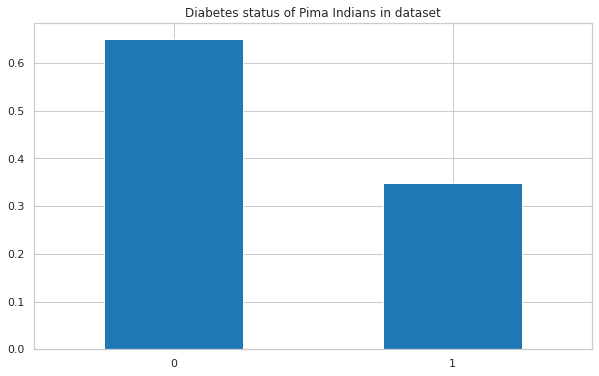

In [ ]:
df['Outcome'].value_counts(normalize = 'True').plot.bar(rot = 0)
plt.title("Diabetes status of Pima Indians in dataset");

From this plot, we can see that there are maximum number of the persons who are non-diabetic as compared to the diabetic patients. 
0 indicates the non-diabetic persons and 1 indicates the diabetic patients. 
So, now let's find out exactly how many number of individuals are diabetic and how many are not. 

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

So, we see that 500 out of 768 people are non-diabetic and little more than half of the total amount of people are diabetic.

In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


We can see clearly that the diabetic people have more glucose level than the non-diabetic ones. Another observation is the pretty high difference between the Insulin values of diabetic and non-diabetic people as compared to the slight difference between the other values of BloodPressure, SkinThickness, BMI and Age. The difference between the values of DiabetesPedigreeFunction for diabetic and non-diabetic individuals is pretty good for making out the difference. 


# **Machine Learning**

Separating out the data and labels.

Here, our target variable is column "Outcome", and rest other are the predictor variables.

In [ ]:
X = df.drop(columns = "Outcome", axis = 1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


So, here we see the rest columns information after the target variable's column is dropped from the dataset. We are going to store it another variable as new dataframe.

In [ ]:
Y = df['Outcome']
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split method

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


As there is good separation between the training and testing data, our model will be able to handle the prediction more efficiently. 

Now, we are going to train the model

In [ ]:
classifier = svm.SVC(kernel= 'linear')

Now, we are training the Support vector machine classifier

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Finding the accuracy score on the training data

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print("Accuracy score of the training data is : {:.3f} ".format(training_data_accuracy))

Accuracy score of the training data is : 0.783 


Now, we will see what is the accuracy score on the test data.

In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print("Accuracy score of the test data is : {:.3f}".format(test_data_accuracy))

Accuracy score of the test data is : 0.773


Making a Predictive System

# **Saving the trained model**

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

loading the saved model

In [ ]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

#changing the input_data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]== 0):
  print("The person is not diabetic.")
else:
  print("The person is diabetic.")

[1]
The person is diabetic.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
